In [ ]:
import numpy as np
import pandas as pd

In [ ]:
text_df=pd.read_csv('/content/SPAM text message 20170820 - Data.csv')

In [ ]:
text_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
text_df['Message'] = text_df['Message'].apply(nltk.sent_tokenize)

In [ ]:
text_df.head()

,Category,Message
0,ham,"[Go until jurong point, crazy.., Available onl..."
1,ham,"[Ok lar..., Joking wif u oni...]"
2,spam,[Free entry in 2 a wkly comp to win FA Cup fin...
3,ham,[U dun say so early hor... U c already then sa...
4,ham,"[Nah I don't think he goes to usf, he lives ar..."


In [ ]:
text_df['Message'] = text_df['Message'].apply(lambda x: [word_tokenize(sentence) for sentence in x])

In [ ]:
text_df.head()

,Category,Message
0,ham,"[[Go, until, jurong, point, ,, crazy, ..], [Av..."
1,ham,"[[Ok, lar, ...], [Joking, wif, u, oni, ...]]"
2,spam,"[[Free, entry, in, 2, a, wkly, comp, to, win, ..."
3,ham,"[[U, dun, say, so, early, hor, ..., U, c, alre..."
4,ham,"[[Nah, I, do, n't, think, he, goes, to, usf, ,..."


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(sentences):
  filtered_sentences = []
  for sentence in sentences:
    filtered_sentence = [word for word in sentence if word.lower() not in stop_words]
    filtered_sentences.append(filtered_sentence)
  return filtered_sentences

text_df['Message'] = text_df['Message'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text_df.head()

,Category,Message
0,ham,"[[Go, jurong, point, ,, crazy, ..], [Available..."
1,ham,"[[Ok, lar, ...], [Joking, wif, u, oni, ...]]"
2,spam,"[[Free, entry, 2, wkly, comp, win, FA, Cup, fi..."
3,ham,"[[U, dun, say, early, hor, ..., U, c, already,..."
4,ham,"[[Nah, n't, think, goes, usf, ,, lives, around..."


In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_sentences(sentences):
  stemmed_sentences = []
  for sentence in sentences:
    stemmed_sentence = [stemmer.stem(word) for word in sentence]
    stemmed_sentences.append(stemmed_sentence)
  return stemmed_sentences

text_df['Message'] = text_df['Message'].apply(stem_sentences)

In [ ]:
text_df.head()

,Category,Message
0,ham,"[[go, jurong, point, ,, crazi, ..], [avail, bu..."
1,ham,"[[ok, lar, ...], [joke, wif, u, oni, ...]]"
2,spam,"[[free, entri, 2, wkli, comp, win, fa, cup, fi..."
3,ham,"[[u, dun, say, earli, hor, ..., u, c, alreadi,..."
4,ham,"[[nah, n't, think, goe, usf, ,, live, around, ..."


In [ ]:
nltk.download('averaged_perceptron_tagger')
def pos_tag_sentences(sentences):
  tagged_sentences = []
  for sentence in sentences:
    tagged_sentence = nltk.pos_tag(sentence)
    tagged_sentences.append(tagged_sentence)
  return tagged_sentences

text_df['Message'] = text_df['Message'].apply(pos_tag_sentences)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
text_df.head()

,Category,Message
0,ham,"[[(go, VB), (jurong, JJ), (point, NN), (,, ,),..."
1,ham,"[[(ok, JJ), (lar, NN), (..., :)], [(joke, NN),..."
2,spam,"[[(free, JJ), (entri, NN), (2, CD), (wkli, NN)..."
3,ham,"[[(u, JJ), (dun, NNS), (say, VBP), (earli, JJ)..."
4,ham,"[[(nah, JJ), (n't, RB), (think, VB), (goe, JJ)..."


In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_sentences(sentences):
      lemmatized_sentences = []
      for sentence in sentences:
        lemmatized_sentence = [lemmatizer.lemmatize(word[0], pos=word[1][0].lower()) if word[1][0].lower() in ['a', 'n', 'v'] else word[0] for word in sentence]
        lemmatized_sentences.append(lemmatized_sentence)
      return lemmatized_sentences

text_df['Message'] = text_df['Message'].apply(lemmatize_sentences)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
text_df.head()

,Category,Message
0,ham,"[[go, jurong, point, ,, crazi, ..], [avail, bu..."
1,ham,"[[ok, lar, ...], [joke, wif, u, oni, ...]]"
2,spam,"[[free, entri, 2, wkli, comp, win, fa, cup, fi..."
3,ham,"[[u, dun, say, earli, hor, ..., u, c, alreadi,..."
4,ham,"[[nah, n't, think, goe, usf, ,, live, around, ..."


In [ ]:
def chunk_sentences(sentences):
  chunked_sentences = []
  grammar = "NP: {<DT>?<JJ>*<NN>}"
  cp = nltk.RegexpParser(grammar)
  for sentence in sentences:
    tagged_sentence = nltk.pos_tag(sentence)
    chunked_sentence = cp.parse(tagged_sentence)
    chunked_sentences.append(chunked_sentence)
  return chunked_sentences

text_df['Message'] = text_df['Message'].apply(chunk_sentences)

In [ ]:
text_df.head()

,Category,Message
0,ham,"[[(go, VB), [('jurong', 'JJ'), ('point', 'NN')..."
1,ham,"[[[('ok', 'JJ'), ('lar', 'NN')], (..., :)], [[..."
2,spam,"[[[('free', 'JJ'), ('entri', 'NN')], (2, CD), ..."
3,ham,"[[(u, JJ), (dun, NNS), (say, VBP), [('earli', ..."
4,ham,"[[(nah, JJ), (n't, RB), (think, VB), (goe, JJ)..."


In [ ]:
chunk_parser = nltk.RegexpParser("NP: {<DT>?<JJ>*<NN>}") # Define grammar directly
tree = chunk_parser.parse(text_df['Message'][0][0])
print(tree)

(S go/VB (NP jurong/JJ point/NN) ,/, (NP crazi/NN) (NP ../NN))


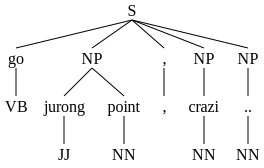

In [ ]:
!pip install svgling
from nltk.tree import Tree
from svgling import draw_tree

# Assuming 'tree' is your NLTK tree object
draw_tree(tree)

In [ ]:
def chunk_sentences(sentences):
  chunked_sentences = []
  grammar = """NP: {<DT>?<JJ>*<NN>}
                       }<VB.*>+{""" # This is the chinking part
  cp = nltk.RegexpParser(grammar)
  for sentence in sentences:
    # Check if sentence is a list (which may contain tuples)
    if isinstance(sentence, list):
      # If sentence is a list, iterate over its elements
      for sub_sentence in sentence:
        # Check if sub_sentence is a tree
        if isinstance(sub_sentence, nltk.tree.Tree):
          # Extract tokens from the tree
          tokens = [word for word, tag in sub_sentence.leaves()]
          tagged_sentence = nltk.pos_tag(tokens)
          chunked_sentence = cp.parse(tagged_sentence)
          chunked_sentences.append(chunked_sentence)
        else:
          tagged_sentence = nltk.pos_tag(sub_sentence)
          chunked_sentence = cp.parse(tagged_sentence)
          chunked_sentences.append(chunked_sentence)
    else:
      # Otherwise, process sentence as before
      tagged_sentence = nltk.pos_tag(sentence)
      chunked_sentence = cp.parse(tagged_sentence)
      chunked_sentences.append(chunked_sentence)
  return chunked_sentences

text_df['Message'] = text_df['Message'].apply(chunk_sentences)

In [ ]:
text_df.head()

,Category,Message
0,ham,"[[(go, VB), (VB, NNP)], [[('jurong', 'NN')], [..."
1,ham,"[[[('ok', 'JJ'), ('lar', 'NN')]], [(..., :), (..."
2,spam,"[[[('free', 'JJ'), ('entri', 'NN')]], [(2, CD)..."
3,ham,"[[(u, JJ), (JJ, NNP)], [[('dun', 'NN')], (NNS,..."
4,ham,"[[(nah, NNS), (JJ, NNP)], [(n't, RB), (RB, NNP..."


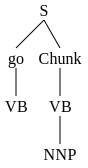

In [ ]:
grammar = """Chunk: {<.*>+}
                       }<VB.*>+{"""
chunk_parser = nltk.RegexpParser(grammar)
tree = chunk_parser.parse(text_df['Message'][0][0])
draw_tree(tree)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


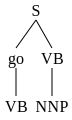

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
tree = nltk.ne_chunk(text_df['Message'][0][0])
draw_tree(tree)